<a href="https://colab.research.google.com/github/DSNortsev/Algorithms/blob/master/StateFarm/Data_Science_task/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing the Libraries

In [73]:
!pip install pyspellchecker==0.5.6
!pip install fast-autocomplete[levenshtein]

## Importing the Libraries

In [74]:
# Load libraries
import numpy as np
import pandas as pd
import random
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from spellchecker import SpellChecker
from fast_autocomplete import AutoComplete
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## Reading CSV files

In [80]:
df_train = pd.read_csv('exercise_20_train.csv')
df_test = pd.read_csv('exercise_20_test.csv')

## Data preprocessing

In [81]:
# Print Train data
df_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.963686,6.627185,-45.224008,9.477531,-3.216532,13.216874,9.754747,5.245851,-1.102918,-2.867482,-37.632285,-12.983484,-30.244259,0.293407,-4.808540,9.293345,1.646353,5.687031,-14.049164,-1.158595,-20.776226,-0.789881,-39.396519,1.235763,-5.403411,-0.012328,0.703963,-22.946374,0.114717,-1.108137,-7.513845,1.278470,-3.606321,1.615670,chrystler,thur,-1.774488,8.804852,2.136329,2.501032,...,7.083087,-12.264477,8.626495,0.065363,-0.124457,21.750625,-5.282121,sept.,6.153703,-6.272020,17.255821,5.782086,15.141420,33.884019,-2.389519,-1.766949,-17.897092,3.736479,40.082477,16.640042,1.680384,0.373888,-13.562891,13.158882,2.289092,-3.881315,-15.959124,2.940515,-2.555928,-37.601994,0.988829,0.313772,asia,1.380664,-16.388994,5.326730,4.187294,0.045549,-3.646841,0
1,-1.770062,-23.610459,-0.964003,-31.981497,-10.294599,-10.240251,-1.518888,-1.675208,0.498134,-0.614390,47.652135,6.567264,-30.410216,-1.301751,-6.042590,1.817864,4.379207,5.676816,-37.757544,2.164646,59.052864,-1.480575,-35.736992,-8.580044,4.206910,0.732038,-1.109053,15.986872,-0.534066,5.795439,-2.556791,2.990327,-1.603091,0.633938,volkswagon,thur,0.040507,6.645667,3.205207,3.567783,...,-4.212509,1.039474,-7.251746,0.661180,-7.073426,-36.774709,-11.458640,July,10.030685,0.918319,-38.648511,-24.077239,16.991279,19.847963,1.106517,6.949901,15.688587,4.610910,-15.223066,4.880278,6.029540,-0.506606,-16.914889,-8.219612,1.639064,7.030400,-11.601869,-4.907436,-6.075066,-27.168761,-2.162863,1.809807,asia,2.500590,4.338834,-1.583225,-1.172417,0.011216,0.097180,0
2,9.962401,-8.349849,23.248891,-24.196879,8.937480,10.965000,-7.490596,-3.025094,0.595807,0.382732,5.629537,3.769767,17.623199,-0.396468,-10.022546,1.158419,12.353464,0.398796,-0.201112,-5.803935,7.104037,2.393360,-30.622601,-12.318385,-6.341881,-0.055468,-1.176393,-13.288725,-0.383693,0.122918,-4.791641,-10.250248,5.837668,-3.756878,bmw,thurday,0.448073,-2.639292,-1.940933,-11.196415,...,-2.434721,-1.433001,7.734776,0.489224,0.535575,2.491412,-9.652969,July,16.090371,0.180281,10.326921,-12.845434,19.811216,-44.341947,-0.513749,-1.495533,3.605778,0.480531,39.328247,-19.626495,9.321199,1.036403,19.435797,-7.605212,-3.937989,3.702377,-2.246263,1.441523,-5.642358,-90.377656,1.779660,9.528113,asia,1.396475,7.839188,10.402396,1.288991,0.008209,-4.132316,0
3,-5.780709,-25.261584,1.383115,-11.786929,7.993078,-11.245752,-2.607351,-3.513896,-0.614235,-1.453979,-2.636676,-3.595789,-19.648688,0.393391,-3.470142,0.102685,-0.882429,-1.598535,12.869959,5.374145,30.723272,4.541173,-59.270400,-0.101281,4.451334,0.650121,-1.154275,-19.434740,1.471404,9.678197,4.149206,-2.814893,-10.966831,6.516250,nissan,thurday,-0.625046,1.918934,1.046202,-6.727565,...,5.354954,0.002768,9.552721,-4.347074,1.513008,14.245827,1.555428,July,10.215072,5.658302,-39.728801,-22.905705,34.801687,-46.836184,-3.566841,-5.437052,-30.365259,0.494604,-6.350004,5.259606,0.073402,-0.174985,16.510493,1.141095,1.848256,-0.586822,2.902637,-2.598303,-1.431961,-57.211280,-0.203206,4.892248,asia,0.744317,7.380982,7.599323,-8.022884,-0.067624,-1.796198,0
4,1.211541,1.119963,7.512938,21.987312,-5.155392,10.339416,3.045180,-0.619230,-0.928068,0.405024,-16.683612,6.534574,-39.182061,-0.424392,1.372472,-0.962540,0.269750,-0.303965,-9.051790,2.298528,-5.081549,1.782286,-5.537197,-0.048488,0.450021,0.121331,-0.677065,28.398174,0.108270,-0.159321,-9.267869,-2.649007,3.523005,2.563282,volkswagon,wed,-0.739334,-2.391980,0.749308,-2.578158,...,-14.064016,1.411826,-21.603894,-0.605150,0.796472,3.526055,0.437480,Jun,-10.153478,-5.454158,28.804591,28.425184,-43.820246,-48.035462,-3.051452,9.431541,-9.649372,2.554174,51.869011,-25.836412,-15.730675,-1.064753,4.014083,2.759471,3.37070

In [82]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,39988.0,2.020255,9.590599,-36.842503,-4.461433,2.022412,8.389979,44.478690
x1,39990.0,-3.924559,18.768656,-79.156374,-16.591552,-4.061703,8.529110,77.682652
x2,39993.0,1.006619,21.062970,-89.728356,-13.230956,1.184946,15.221205,84.625640
x3,39987.0,-1.378330,29.397779,-126.652341,-21.297149,-1.224625,18.530623,117.004453
x4,39993.0,0.070199,20.243287,-76.412886,-13.580632,0.091600,13.722427,85.934044
...,...,...,...,...,...,...,...,...
x96,39986.0,-0.317345,9.321339,-42.409405,-6.561087,-0.228287,5.939217,38.649613
x97,39991.0,-0.562453,4.050658,-16.287032,-3.293697,-0.548699,2.138787,17.069095
x98,39996.0,0.000484,0.060034,-0.250606,-0.039977,0.000486,0.041186,0.221392
x99,39987.0,0.179715,4.506750,-18.876474,-2.879191,0.171954,3.237456,18.097897


In [83]:
df_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.519093,-4.606038,13.707586,-17.990903,12.873394,14.910935,2.915341,-10.110081,1.628317,-0.365064,10.646442,3.922680,34.998362,2.433472,-3.858548,0.104192,-5.519994,3.467700,31.000121,-4.590834,0.086110,6.255197,4.697129,2.180207,7.108676,-0.908606,-0.515504,45.331378,1.637379,-9.039186,-0.790305,2.265819,-4.036708,6.636670,bmw,thurday,0.220489,-1.358649,2.930821,-6.678993,...,-4.914587,-14.550192,-5.232047,-26.134083,14.509004,0.416692,-22.838256,-2.857738,Jun,-10.884239,3.085385,63.367373,4.372968,-14.474131,-46.024063,2.540470,10.338857,12.721655,1.992730,-19.241954,-47.967821,8.581891,0.996542,10.724987,7.760128,5.567248,2.267702,0.024121,-0.532450,-5.916457,-138.889799,-0.246395,-1.912581,asia,-0.633811,1.181750,-0.836542,-2.144871,0.010353,-4.819828
1,-12.357004,13.874141,14.052924,34.129247,34.511107,34.583336,-0.482540,-6.583407,-4.326799,-1.216928,-5.709141,6.175520,2.121554,1.578756,2.038905,-5.592737,-2.158564,0.521756,37.805522,1.901376,37.967075,4.546150,8.383848,9.278303,-7.514222,-1.407846,-0.761477,-18.080597,0.510580,4.201491,-0.544123,1.078374,2.652454,1.915220,tesla,thurday,0.874948,2.237308,-2.800175,-2.606274,...,-0.187795,1.657564,-12.863514,-14.917924,4.622873,-3.404009,-6.014435,6.476535,May,23.032601,0.134983,-39.146113,4.458458,-23.588318,-24.292462,-1.657806,-2.733824,15.606533,0.216613,25.813679,59.937780,0.012385,0.107180,-20.315577,-8.655952,-4.170537,8.350734,13.554121,3.673744,-1.785349,117.305737,0.316266,6.838756,asia,-4.357530,0.390822,14.052604,-2.744911,-0.005648,-1.253519
2,1.834922,2.665252,-44.873210,21.941920,10.102981,5.962249,-5.733909,-4.061670,-0.172269,0.096051,22.315785,3.330807,-8.121101,-1.985411,6.428962,-2.646925,8.367280,-5.545219,5.879821,10.221974,-9.095619,-1.368356,-39.691225,5.286057,0.562340,0.016971,1.894738,10.513043,1.026482,-7.617738,9.442215,2.980519,3.070543,-1.370332,Honda,thurday,-1.454560,-3.010714,1.356234,9.807104,...,13.568331,12.005017,0.017017,-4.266916,-3.012223,-5.088874,9.907362,-12.322727,Jun,-28.776837,-1.321741,11.003258,-7.499675,22.115380,-37.524947,0.888089,0.662938,1.793714,-3.878713,-2.324871,-38.409542,1.975282,0.540509,31.884014,-3.407244,2.122876,-10.592297,-6.830781,0.551768,-2.317764,-66.548569,-0.657101,3.128596,asia,1.880922,0.810115,15.737267,-9.031679,0.089295,-4.285350
3,20.972483,11.548506,-40.924625,-35.296796,-35.253101,-14.601890,5.045075,10.841771,-1.872260,-0.002583,60.212310,-11.716837,-17.011739,-1.363757,2.843387,-0.390018,-0.504431,-0.001356,-45.845038,-2.662568,-0.540813,11.362248,-19.387491,-2.160935,3.217326,-0.456019,0.762841,-33.240271,-1.254007,-4.757926,-2.848993,3.598553,-1.466811,-6.091896,volkswagon,thurday,-0.387709,1.472792,2.963676,-11.401523,...,5.103674,-2.190475,-5.299044,-1.243398,15.140766,3.999990,36.387867,-5.651444,sept.,-17.961932,2.802529,9.772352,4.565211,49.274375,-22.745785,6.892522,4.513212,-13.017882,-0.429544,26.759971,-16.694840,0.824581,-0.854778,14.052699,8.700661,-2.650097,10.092507,-12.210058,0.939368,5.234044,-150.133466,-0.391609,-4.306940,asia,-2.326108,-1.968523,-4.292831,-1.674606,-0.088565,-0.981937
4,-9.916044,5.509811,31.749288,-0.803916,-4.005098,20.912490,0.419346,-2.949516,1.057176,-0.338547,25.056651,3.103853,-7.541111,1.521165,12.184929,-2.534174,2.732948,3.906203,-6.551110,-2.489374,8.318352,2.012928,2.698287,8.943937,-2.595725,0.148272,0.672342,-24.317962,-0.897424,-6.902125,-11.206673,-1.611313,-0.503040,7.663023,volkswagon,thurday,0.340081,-3.284034,3.318112,-1.255465,...,1.339638,4.196005,-5.997144,-24.016444,-3.917210,2.905353,-8.326432,5.396941,Jun,15.303420,3.057188,32.200252,12.589935,13.633266,-54.305909,-3.067460,2.843016,26.788235,0.419318,0.266520,35.3376

### Find total count of "Y" values

In [84]:
df_train['y'].value_counts()

0    31853
1     8147
Name: y, dtype: int64

In [85]:
# List all data types in data set
df_train.dtypes.unique()
# Based on result Y column is the only interger type

array([dtype('float64'), dtype('O'), dtype('int64')], dtype=object)

In [86]:
# Find all object columns
df_categorical = df_train.select_dtypes(include='object').columns.values.tolist()
df_categorical

['x34', 'x35', 'x41', 'x45', 'x68', 'x93']

In [87]:
# Find all float columns
df_numerical = df_train.select_dtypes(include='float64').columns.values.tolist()
print(df_numerical)

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x36', 'x37', 'x38', 'x39', 'x40', 'x42', 'x43', 'x44', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99']


### Handle NaN values, correct spelling mistakes and normalize categorical data

In [88]:
# Print unique values
for column_name in  df_categorical:
  print(f'{column_name} : {df_train[column_name].unique()}')

x34 : ['chrystler' 'volkswagon' 'bmw' 'nissan' 'tesla' 'Toyota' 'Honda'
 'mercades' 'ford' 'chevrolet' nan]
x35 : ['thur' 'thurday' 'wed' 'tuesday' 'wednesday' 'friday' 'fri' 'monday' nan]
x41 : ['$-865.28' '$325.27' '$743.91' ... '$60.77' '$-982.23' '$-904.25']
x45 : ['0.02%' '-0.01%' '0.0%' '0.01%' '-0.0%' '-0.02%' '-0.03%' '0.03%' nan
 '0.04%' '-0.04%']
x68 : ['sept.' 'July' 'Jun' 'Nov' 'Mar' 'May' 'Oct' 'Aug' 'Apr' 'Dev' 'Feb'
 'January' nan]
x93 : ['asia' 'america' 'euorpe' nan]


In [89]:
# Imputation Categorical features
# Replace missing values with the most common class

df_train[df_categorical] = df_train[df_categorical].apply(lambda x: x.fillna(x.value_counts().index[0]))
df_train[df_categorical].isnull().sum()

x34    0
x35    0
x41    0
x45    0
x68    0
x93    0
dtype: int64

In [90]:
for column_name in  df_categorical:
  print(f'{column_name} : {df_train[column_name].unique()}')

x34 : ['chrystler' 'volkswagon' 'bmw' 'nissan' 'tesla' 'Toyota' 'Honda'
 'mercades' 'ford' 'chevrolet']
x35 : ['thur' 'thurday' 'wed' 'tuesday' 'wednesday' 'friday' 'fri' 'monday']
x41 : ['$-865.28' '$325.27' '$743.91' ... '$60.77' '$-982.23' '$-904.25']
x45 : ['0.02%' '-0.01%' '0.0%' '0.01%' '-0.0%' '-0.02%' '-0.03%' '0.03%' '0.04%'
 '-0.04%']
x68 : ['sept.' 'July' 'Jun' 'Nov' 'Mar' 'May' 'Oct' 'Aug' 'Apr' 'Dev' 'Feb'
 'January']
x93 : ['asia' 'america' 'euorpe']


In [91]:
# Build auto-complete vocabulary 
auto_makers = {'bmw': {},
               'chrysler': {},
               'volkswagen': {},
               'nissan': {},
               'tesla': {},
               'toyota': {},
               'honda': {},
               'tesla': {},
               'mercedes': {},
               'ford': {},
               'chevrolet': {}
               }

weekdays = {'monday': {},
            'tuesday': {},
            'wednesday': {},
            'thursday':{},
            'friday':{},
            'sarturday':{},
            'sunday': {}
            }

countries = {'asia': {},
            'america': {},
            'europe': {}
            }

months = {'january': {},
               'february': {},
               'march': {},
               'april': {},
               'may': {},
               'june': {},
               'july': {},
               'august': {},
               'september': {},
               'october': {},
               'november': {},
               'december': {}
               }

words = {}
for d in [auto_makers, weekdays, countries, months]:
  words.update(d)

In [92]:
# Instantiate SpellChecker class
spell = SpellChecker()
known_words = ['bmw', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun', 'jan', 
               'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
               'nov', 'dec']
# Load known words that does not need to be corrected
spell.word_frequency.load_words(known_words)
# Instantiate AutoComplete class with available vocabulary
autocomplete = AutoComplete(words=words)

for column_name in  ('x34', 'x35', 'x68', 'x93'):
  for value in df_train[column_name].unique():
    # Remove all special characters
    processed_value = re.sub('[^a-z0-9]+', '', value.lower())
    # Correct spelling mistakes
    processed_value = spell.correction(processed_value)
    # Auto-complete word
    processed_value = autocomplete.search(word=processed_value, max_cost=1, size=1)[0][0]
    # Update value in column
    df_train[column_name] = df_train[column_name].map(lambda x: re.sub(f'^{value}$', processed_value, x))

In [93]:
# Remove special characters and convert string to float
for column_name in  ('x41', 'x45'):
  df_train[column_name] = df_train[column_name].map(lambda x: re.sub(r'[$,%]', '', x)).astype(float)

### Handle NaN values and normalize numerical data

In [94]:
# Replace Nan (missing values) with mean value by using impute method for numerical data
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_num_imputed = imputer.fit_transform(df_train[df_numerical])
# Normaliza data bewtween 0 and 1 by using MixMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_num_imputed)
df_num_scaled = scaler.transform(df_num_imputed)
df_num_processed = pd.DataFrame(df_num_scaled, columns=df_numerical)
df_num_processed

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
0,0.464900,0.546953,0.255253,0.558695,0.450864,0.586741,0.599612,0.545003,0.370513,0.230554,0.370748,0.253041,0.373289,0.527066,0.423272,0.782318,0.558933,0.663081,0.443486,0.467809,0.427311,0.457638,0.346155,0.584970,0.308755,0.469789,0.611784,0.301079,0.486250,0.465865,0.368782,0.546538,0.414077,0.555004,0.199095,0.824436,0.635675,0.540482,0.438184,0.404429,...,0.406564,0.552754,0.350381,0.553349,0.326894,0.599632,0.483495,0.496708,0.650522,0.439091,0.536439,0.184606,0.591506,0.581255,0.630500,0.576518,0.457530,0.419254,0.382178,0.583757,0.719648,0.525583,0.502847,0.529764,0.436141,0.725760,0.628312,0.401753,0.262635,0.598918,0.387139,0.493269,0.532607,0.513050,0.564427,0.303003,0.588906,0.613810,0.627450,0.411897
1,0.431283,0.354159,0.509104,0.388542,0.407265,0.428470,0.412410,0.404192,0.479079,0.445984,0.650158,0.603148,0.372469,0.425651,0.403710,0.518413,0.629934,0.662794,0.363962,0.549344,0.719909,0.445071,0.360565,0.433448,0.501233,0.515562,0.380101,0.604088,0.374876,0.622092,0.468379,0.595121,0.468893,0.533661,0.469547,0.744645,0.698864,0.557721,0.498998,0.313049,...,0.421996,0.475855,0.482033,0.433877,0.537061,0.452096,0.493900,0.281679,0.292792,0.363294,0.564965,0.500069,0.393418,0.347793,0.638173,0.531990,0.538710,0.667554,0.534436,0.602601,0.453115,0.478036,0.600043,0.373079,0.412640,0.420025,0.600733,0.629499,0.328892,0.350861,0.298631,0.502746,0.303985,0.537217,0.611012,0.581194,0.503660,0.453129,0.554711,0.513157
2,0.575556,0.451460,0.647976,0.420491,0.525728,0.571547,0.313247,0.376728,0.485702,0.541324,0.512483,0.553051,0.609955,0.483206,0.340618,0.495132,0.837108,0.514726,0.489935,0.353836,0.529501,0.515556,0.380703,0.375741,0.289959,0.467136,0.371495,0.376242,0.400690,0.493723,0.423476,0.219352,0.672501,0.438205,0.530278,0.401529,0.394640,0.319129,0.427743,0.351345,...,0.506615,0.521224,0.871184,0.452680,0.498003,0.591346,0.490897,0.517132,0.532802,0.385453,0.609551,0.467689,0.566954,0.435611,0.649870,0.328356,0.501087,0.426985,0.479659,0.513591,0.716013,0.378950,0.673606,0.647659,0.667495,0.428812,0.364112,0.560038,0.471155,0.551538,0.309514,0.445331,0.589974,0.661899,0.565084,0.628173,0.651523,0.526920,0.548340,0.398767
3,0.381964,0.343631,0.522566,0.471423,0.519911,0.421686,0.394335,0.366783,0.403650,0.365706,0.485401,0.421152,0.425676,0.533423,0.444489,0.457862,0.493234,0.458694,0.533778,0.628089,0.616073,0.554635,0.267901,0.564331,0.506129,0.510525,0.374322,0.328409,0.719147,0.709959,0.603116,0.430368,0.212665,0.661542,0.370373,0.569973,0.571230,0.391346,0.515602,0.389799,...,0.328104,0.251391,0.719374,0.535071,0.520684,0.608238,0.406443,0.547378,0.604650,0.522999,0.566321,0.708027,0.389590,0.356953,0.712052,0.320443,0.430192,0.314710,0.325654,0.513895,0.495876,0.479570,0.466934,0.432092,0.646986,0.553893,0.609609,0.470514,0.549450,0.423848,0.415407,0.475457,0.446137,0.587011,0.537957,0.622024,0.616942,0.247755,0.387677,0.461949
4,0.467947,0.511839,0.557723,0.610037,0.438921,0.567326,0.488198,0.425676,0.382370,0.543455,0.439381,0.602562,0.329099,0.481431,0.521255,0.420256,0.523168,0.495011,0.460248,0.552629,0.484837,0.504438,0.479478,0.565146,0.425989,0.478008,0.435304,0.700682,0.485143,0.487336,0.333540,0.435076,0.609163,0.575605,0.353343,0.410668,0.553679,0.458401,0.517684,0.542581,...,0.507207,0.459197,0.823017,0.329678,0.542943,0.318739,0.471787,0.525205,0.539126,0.509280,0.416453,0.220489,0.632427,0.758295,0.385921,0.316638,0.442160,0.738244,0.419568,0.558278,0.776451,0.353842,0.113739,0.273756,0.559373,0.577038,0.674203,0.433204,0.510307,0.245839,0.556362,0.394710,0.478920,0.809982,0.577843,0.367919,0.527901,0.381836,0.414041,0.420074
...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Encode categorical data to binary by using dummy encoder

In [95]:
# Encode categorial data to binary by using dummy encoder
df_categorical = df_train.select_dtypes(include='object').columns.values.tolist()
df_categ_processed = pd.get_dummies(df_train[df_categorical], columns = df_categorical)
df_categ_processed

,x34_bmw,x34_chevrolet,x34_chrysler,x34_ford,x34_honda,x34_mercedes,x34_nissan,x34_tesla,x34_toyota,x34_volkswagen,x35_friday,x35_monday,x35_thursday,x35_tuesday,x35_wednesday,x68_april,x68_august,x68_december,x68_february,x68_january,x68_july,x68_june,x68_march,x68_may,x68_november,x68_october,x68_september,x93_america,x93_asia,x93_europe
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
39996,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
39997,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
39998,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Concatenate numerical, categorical and "Y" columns back to Pandas DataFrame

In [96]:
# Concatenate back numerical, categorical and y columns
df_processed = pd.concat([df_num_processed, df_categ_processed, df_train['y'] ], axis=1, sort=False)
df_processed 

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,x34_bmw,x34_chevrolet,x34_chrysler,x34_ford,x34_honda,x34_mercedes,x34_nissan,x34_tesla,x34_toyota,x34_volkswagen,x35_friday,x35_monday,x35_thursday,x35_tuesday,x35_wednesday,x68_april,x68_august,x68_december,x68_february,x68_january,x68_july,x68_june,x68_march,x68_may,x68_november,x68_october,x68_september,x93_america,x93_asia,x93_europe,y
0,0.464900,0.546953,0.255253,0.558695,0.450864,0.586741,0.599612,0.545003,0.370513,0.230554,0.370748,0.253041,0.373289,0.527066,0.423272,0.782318,0.558933,0.663081,0.443486,0.467809,0.427311,0.457638,0.346155,0.584970,0.308755,0.469789,0.611784,0.301079,0.486250,0.465865,0.368782,0.546538,0.414077,0.555004,0.199095,0.824436,0.635675,0.540482,0.438184,0.404429,...,0.493269,0.532607,0.513050,0.564427,0.303003,0.588906,0.613810,0.627450,0.411897,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.431283,0.354159,0.509104,0.388542,0.407265,0.428470,0.412410,0.404192,0.479079,0.445984,0.650158,0.603148,0.372469,0.425651,0.403710,0.518413,0.629934,0.662794,0.363962,0.549344,0.719909,0.445071,0.360565,0.433448,0.501233,0.515562,0.380101,0.604088,0.374876,0.622092,0.468379,0.595121,0.468893,0.533661,0.469547,0.744645,0.698864,0.557721,0.498998,0.313049,...,0.502746,0.303985,0.537217,0.611012,0.581194,0.503660,0.453129,0.554711,0.513157,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.575556,0.451460,0.647976,0.420491,0.525728,0.571547,0.313247,0.376728,0.485702,0.541324,0.512483,0.553051,0.609955,0.483206,0.340618,0.495132,0.837108,0.514726,0.489935,0.353836,0.529501,0.515556,0.380703,0.375741,0.289959,0.467136,0.371495,0.376242,0.400690,0.493723,0.423476,0.219352,0.672501,0.438205,0.530278,0.401529,0.394640,0.319129,0.427743,0.351345,...,0.445331,0.589974,0.661899,0.565084,0.628173,0.651523,0.526920,0.548340,0.398767,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.381964,0.343631,0.522566,0.471423,0.519911,0.421686,0.394335,0.366783,0.403650,0.365706,0.485401,0.421152,0.425676,0.533423,0.444489,0.457862,0.493234,0.458694,0.533778,0.628089,0.616073,0.554635,0.267901,0.564331,0.506129,0.510525,0.374322,0.328409,0.719147,0.709959,0.603116,0.430368,0.212665,0.661542,0.370373,0.569973,0.571230,0.391346,0.515602,0.389799,...,0.475457,0.446137,0.587011,0.537957,0.622024,0.616942,0.247755,0.387677,0.461949,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.467947,0.511839,0.557723,0.610037,0.438921,0.567326,0.488198,0.425676,0.382370,0.543455,0.439381,0.602562,0.329099,0.481431,0.521255,0.420256,0.523168,0.495011,0.460248,0.552629,0.484837,0.504438,0.479478,0.565146,0.425989,0.478008,0.435304,0.700682,0.485143,0.487336,0.333540,0.435076,0.609163,0.575605,0.353343,0.410668,0.553679,0.458401,0.517684,0.542581,...,0.394710,0.478920,0.809982,0.577843,0.367919,0.527901,0.381836,0.414041,0.420074,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.433053,0.562896,0.407143,0.550119,0.491640,0.567639,0.584167,0.468702,0.352066,0.703935,0.391200,0.401389,0.429925,0.503518,0.456380,0.484536,0.386972,0.678440,0.722970,0.576670,0.515387,0.451689,0.408661,0.615690,0.410456,0.514330,0.352011,0.592190,0.405025,0.405751,0.655338,0.384528,0.481933,0.487517,0.359365,0.626634,0.499838,0.281505,0.409773,0.477981,...,0.443025,0.788229,0.380308,0.612546,0.328007,0.538729,0.473858,0.591400,0.570997,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
39996,0.777939,0.398126,0.505217,0.598632,0.397412,0.433982,0.504481,0.453499,0.

### Use Correlation Matrix to find highly correlated features

<Figure size 864x864 with 0 Axes>

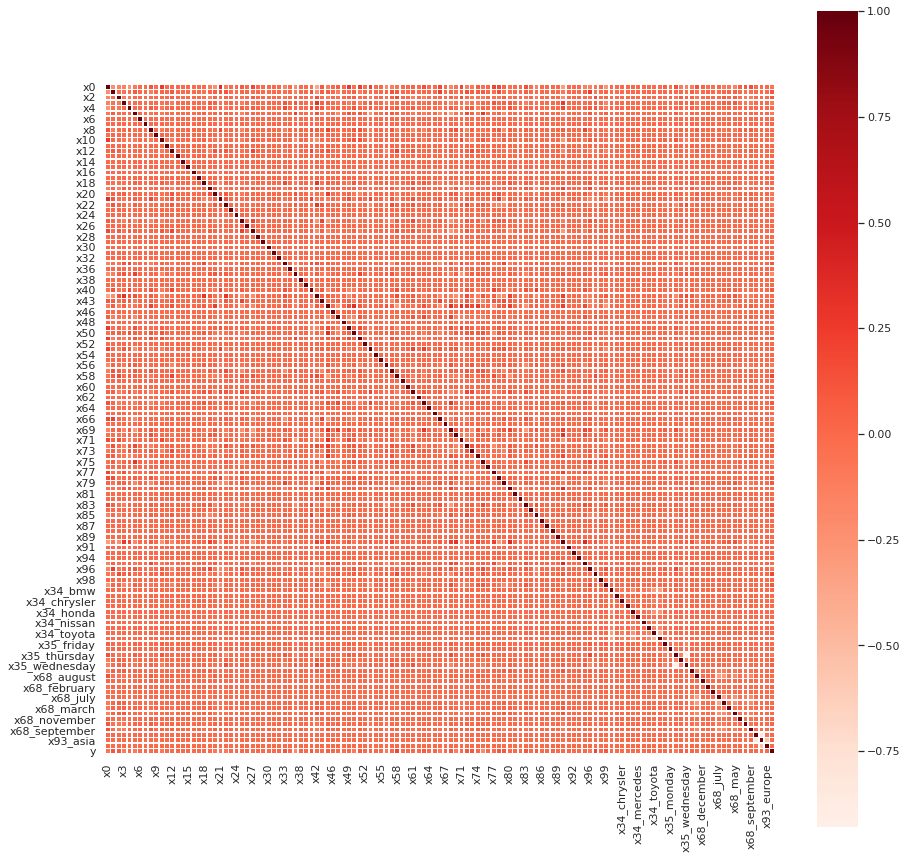

In [97]:
#Using Pearson Correlation
plt.figure(figsize=(12,12))
cor = df_processed .corr()
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(data=cor,
            center=0,
            cmap=plt.cm.Reds, 
            square=True, linewidth=0.5)

In [98]:
#Correlation with output variable
cor_target = abs(cor['y'])
#Selecting highly correlated features
relevant_features_score = cor_target[cor_target>0.01]
relevant_features = relevant_features_score.index.to_list()
print(relevant_features)
print(len(relevant_features))

['x0', 'x1', 'x2', 'x3', 'x5', 'x10', 'x20', 'x21', 'x22', 'x29', 'x33', 'x37', 'x38', 'x40', 'x44', 'x48', 'x50', 'x51', 'x53', 'x56', 'x58', 'x63', 'x66', 'x69', 'x70', 'x72', 'x73', 'x75', 'x78', 'x79', 'x83', 'x85', 'x96', 'x97', 'x99', 'x35_monday', 'x35_thursday', 'x35_tuesday', 'x35_wednesday', 'x68_april', 'x68_august', 'x68_february', 'x68_july', 'x68_march', 'x68_may', 'x68_november', 'x68_october', 'y']
48


## Create Train/Test/Validation datasets

In [99]:
# Split the data into training,testing and validation sets using train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(df_processed[relevant_features].drop(columns=['y']), df_processed ['y'] ,test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = \
        train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [100]:
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}',
      f'X_test:  {X_test.shape},  y_train: {y_test.shape}',
      f'X_val:   {X_val.shape},  y_train: {y_val.shape}', sep='\n')

X_train: (28000, 47), y_train: (28000,)
X_test:  (6000, 47),  y_train: (6000,)
X_val:   (6000, 47),  y_train: (6000,)


## Model Building

### Logistic Regression Model

In [101]:
# Build Logistic Regresssion model
logistic_regression_model = LogisticRegression(penalty='l2', solver='sag', max_iter=1000)
# fit the model
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation

Accuracy of Logistic Regression Classifier on Test dataset: 0.87

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4788
           1       0.77      0.54      0.64      1212

    accuracy                           0.87      6000
   macro avg       0.83      0.75      0.78      6000
weighted avg       0.87      0.87      0.87      6000



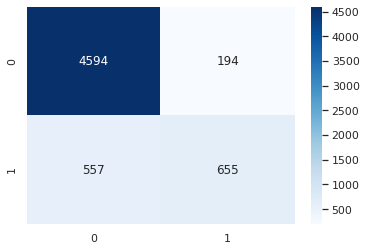

In [102]:
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of Logistic Regression Classifier on Test dataset: {accuracy:.2f}\n')
# Plot Confuzion Matrix
fig, ax =plt.subplots(1,1)
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',  fmt='d',  xticklabels=[0,1],yticklabels=[0,1])

Accuracy of Logistic Regression Classifier on Validation dataset: 0.87

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      4788
           1       0.20      0.15      0.17      1212

    accuracy                           0.71      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.68      0.71      0.69      6000



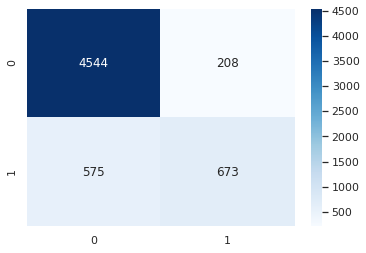

In [103]:
y_pred = logistic_regression_model.predict(X_val)
accuracy = accuracy_score(y_val,y_pred)
print(f'Accuracy of Logistic Regression Classifier on Validation dataset: {accuracy:.2f}\n')
# Plot Confuzion Matrix
fig, ax =plt.subplots(1,1)
conf_matrix = confusion_matrix(y_val, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',  fmt='d',  xticklabels=[0,1],yticklabels=[0,1])

### Random Forest Model

In [104]:
random_forest_model = RandomForestClassifier() 
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Model Evaluation

Accuracy of Random Forest Classifier on Test dataset: 0.89

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4788
           1       0.98      0.46      0.63      1212

    accuracy                           0.89      6000
   macro avg       0.93      0.73      0.78      6000
weighted avg       0.90      0.89      0.87      6000



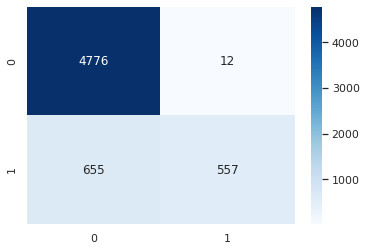

In [105]:
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of Random Forest Classifier on Test dataset: {accuracy:.2f}\n')
# Plot Confuzion Matrix
fig, ax =plt.subplots(1,1)
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',  fmt='d',  xticklabels=[0,1],yticklabels=[0,1])

Accuracy of Random Forest Classifier on Validation dataset: 0.89

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4752
           1       0.98      0.47      0.63      1248

    accuracy                           0.89      6000
   macro avg       0.93      0.73      0.78      6000
weighted avg       0.90      0.89      0.87      6000



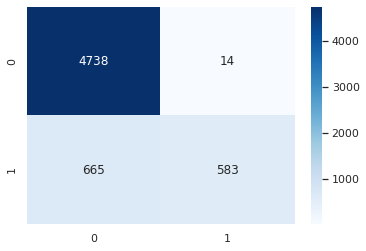

In [108]:
y_pred = random_forest_model.predict(X_val)
accuracy = accuracy_score(y_val,y_pred)
print(f'Accuracy of Random Forest Classifier on Validation dataset: {accuracy:.2f}\n')
# Plot Confuzion Matrix
fig, ax =plt.subplots(1,1)
conf_matrix = confusion_matrix(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',  fmt='d',  xticklabels=[0,1],yticklabels=[0,1])

### Artificial Neural Network (ANN) model

In [109]:
def model_with_2_layers():
  """Build ANN model with 2 Dense layers."""
  model = Sequential()
  model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', name='input_layer'))
  model.add(Dense(25, activation='relu', name='layer_1'))
  model.add(Dense(1, activation='sigmoid', name='output_layer'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model


In [113]:
ann_model = model_with_2_layers()
ann_model.fit(X_train,
       y_train,
       epochs=70,
       shuffle=True, # shuffle data randomly.
       verbose=0, # this will tell keras to print more detailed info
       validation_data=(X_test, y_test)
       )

#### Model Evaluation

In [114]:
# Evaluate ANN model on the test data using `evaluate`
results = ann_model.evaluate(X_val, y_val, batch_size=128, verbose=0)
print(f'Accuracy: {results[1]:.2f}',
      f'Loss:     {results[0]:.3f}',
      sep='\n')

Accuracy: 0.97
Loss:     0.106


Accuracy of Artificial Neural Network on Validation dataset: 0.97

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4794
           1       0.91      0.94      0.92      1206

    accuracy                           0.97      6000
   macro avg       0.94      0.96      0.95      6000
weighted avg       0.97      0.97      0.97      6000



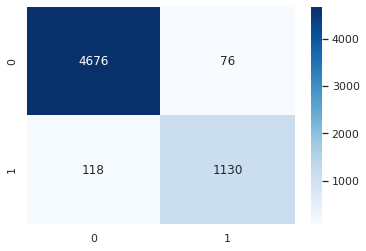

In [115]:
y_pred = (ann_model.predict(X_val) > 0.5).astype("int32").flatten()
accuracy = accuracy_score(y_val,y_pred)
print(f'Accuracy of Artificial Neural Network on Validation dataset: {accuracy:.2f}\n')
# Plot Confuzion Matrix
fig, ax =plt.subplots(1,1)
conf_matrix = confusion_matrix(y_val, y_pred)
print(classification_report(y_pred, y_val))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',  fmt='d',  xticklabels=[0,1],yticklabels=[0,1])

## Preprocessing Prediction Dataset

In [116]:
def process_categorical_data(df):
  """
    Correct spellig mistakes, auto-completing words for categorical data 
    and removes special charcters and convert categorical data to numerical.
  """
  auto_makers = {'bmw': {},
                'chrysler': {},
                'volkswagen': {},
                'nissan': {},
                'tesla': {},
                'toyota': {},
                'honda': {},
                'tesla': {},
                'mercedes': {},
                'ford': {},
                'chevrolet': {}
                }

  weekdays = {'monday': {},
              'tuesday': {},
              'wednesday': {},
              'thursday':{},
              'friday':{},
              'sarturday':{},
              'sunday': {}
              }

  countries = {'asia': {},
              'america': {},
              'europe': {}
              }

  months = {'january': {},
            'february': {},
            'march': {},
            'april': {},
            'may': {},
            'june': {},
            'july': {},
            'august': {},
            'september': {},
            'october': {},
            'november': {},
            'december': {}
            }

  words = {}

  for d in [auto_makers, weekdays, countries, months]:
    words.update(d)

  spell = SpellChecker()
  known_words = ['bmw', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun', 'jan', 
                'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
                'nov', 'dec']
  spell.word_frequency.load_words(known_words)
  autocomplete = AutoComplete(words=words)

  # Get a list of categorical features
  df_categorical = df.select_dtypes(include='object').columns.values.tolist()

  # Imputation Categorical features
  # Replace missing values with the most common class
  df[df_categorical] = df[df_categorical].apply(lambda x: x.fillna(x.value_counts().index[0]))  

  for column_name in  ('x34', 'x35', 'x68', 'x93'):
    for value in df[column_name].unique():
      # Remove all special characters
      processed_value = re.sub('[^a-z0-9]+', '', value.lower())
      # Correct spelling mistakes
      processed_value = spell.correction(processed_value)
      # Auto-complete word
      processed_value = autocomplete.search(word=processed_value, max_cost=1, size=1)[0][0]
      # Update value in column
      df[column_name] = df[column_name].map(lambda x: re.sub(f'^{value}$', processed_value, x))
  
  # Remove special characters and convert string to float
  for column_name in  ('x41', 'x45'):
    df[column_name] = df[column_name].map(lambda x: re.sub(r'[$,%]', '', x)).astype(float)


def impute_numerical_data(df):
  """ Use impute method to replace missing values with mean value and 
      normalize data between 0 and 1 with MinMax Scaler.
   """
  # Get a list of numerical features
  df_numerical = df.select_dtypes(include='float64').columns.values.tolist()

  imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
  df_num_imputed = imputer.fit_transform(df[df_numerical])
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaler.fit(df_num_imputed)
  df_num_scaled = scaler.transform(df_num_imputed)

  return pd.DataFrame(df_num_scaled, columns=df_numerical)


def dummy_encoding_categorical(df):
  """ Encode catrgorical data to binary."""
  # Get a list of categorical features
  df_categorical = df.select_dtypes(include='object').columns.values.tolist()
  return pd.get_dummies(df[df_categorical], columns = df_categorical)


def preprocess_data(df):
  """
    Pre-processe data by dealing with missing values and normalize numerical and 
    categorical data.
  """
  # Process categorical data in place
  process_categorical_data(df)
  # Impute numerical data with mean value and normalize data between 0 and 1
  numerical_df = impute_numerical_data(df)
  #  print(numerical_df)
  # Categorical data encoding method transforms the categorical variable
  # into a set of binary variables 
  categorical_df = dummy_encoding_categorical(df)
  if 'y' in df:
      return pd.concat([numerical_df, categorical_df, df['y'] ], axis=1, sort=False)
  return pd.concat([numerical_df, categorical_df], axis=1, sort=False)

In [117]:
df_processed_test = preprocess_data(df_test)
df_processed_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,x34_bmw,x34_chevrolet,x34_chrysler,x34_ford,x34_honda,x34_mercedes,x34_nissan,x34_tesla,x34_toyota,x34_volkswagen,x35_friday,x35_monday,x35_thursday,x35_tuesday,x35_wednesday,x68_april,x68_august,x68_december,x68_february,x68_january,x68_july,x68_june,x68_march,x68_may,x68_november,x68_october,x68_september,x93_america,x93_asia,x93_europe
0,0.458511,0.515841,0.598980,0.442302,0.580890,0.630122,0.504635,0.267560,0.650089,0.480551,0.513906,0.605543,0.719301,0.665107,0.439008,0.504005,0.416270,0.603352,0.587229,0.316351,0.453163,0.609030,0.519409,0.518322,0.657695,0.398564,0.493367,0.848515,0.812610,0.249997,0.485827,0.570186,0.366550,0.704849,0.565061,0.448582,0.685193,0.376350,0.705361,0.513305,...,0.306876,0.387620,0.459618,0.463148,0.460395,0.562653,0.534085,0.433360,0.524599,0.330994,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0.294616,0.642884,0.601222,0.661994,0.722634,0.775662,0.443910,0.354744,0.147479,0.397320,0.450618,0.649024,0.549647,0.601223,0.541461,0.262725,0.499794,0.515690,0.610483,0.498263,0.609529,0.574483,0.533998,0.646535,0.334469,0.368530,0.460258,0.319663,0.589088,0.596040,0.491747,0.534244,0.533181,0.584906,0.666517,0.592206,0.307893,0.442115,0.438595,0.414867,...,0.428620,0.652397,0.504146,0.626071,0.282919,0.550321,0.742829,0.414554,0.491730,0.430558,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.475259,0.565828,0.218643,0.610623,0.562741,0.563917,0.350060,0.417085,0.498120,0.525605,0.559061,0.594119,0.496792,0.334823,0.617727,0.387488,0.761337,0.335158,0.501396,0.731407,0.415263,0.454929,0.343761,0.574423,0.512994,0.454246,0.817795,0.558132,0.691427,0.287146,0.731908,0.591818,0.543596,0.501440,0.305389,0.382598,0.581530,0.642563,0.463806,0.512631,...,0.412929,0.462384,0.427116,0.556999,0.580249,0.556858,0.766448,0.217515,0.686756,0.345916,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0.718854,0.626896,0.244279,0.369356,0.265623,0.411780,0.542696,0.785519,0.354641,0.515968,0.705703,0.303692,0.450914,0.381288,0.555437,0.483074,0.540895,0.500124,0.324658,0.370381,0.450576,0.712262,0.424104,0.439908,0.571680,0.425791,0.665437,0.193233,0.239050,0.361887,0.436317,0.610525,0.430568,0.381495,0.470776,0.561671,0.687356,0.300092,0.388797,0.709364,...,0.635480,0.376000,0.448126,0.418573,0.379738,0.513534,0.485628,0.448099,0.321409,0.438140,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0.325686,0.585383,0.716116,0.514747,0.470322,0.674522,0.460028,0.444579,0.601885,0.483142,0.569667,0.589739,0.499785,0.596918,0.717722,0.392263,0.621337,0.616400,0.458921,0.375234,0.487145,0.523278,0.511499,0.640496,0.443188,0.462145,0.653256,0.267644,0.309785,0.305848,0.235324,0.452832,0.454576,0.730922,0.583600,0.371682,0.710690,0.463928,0.578638,0.175296,...,0.576941,0.507067,0.225298,0.541479,0.664765,0.743406,0.397158,0.531028,0.632283,0.509041,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.565718,0.479915,0.478392,0.335862,0.505135,0.503276,0.269152,0.287581,0.280086,0.758810,0.607938,0.416810,0.491710,0.626439,0.546418,0.470508,0.556109,0.578796,0.662856,0.191153,0.319762,0.573085,0.671481,0.563498,0.577816,0.530730,0.490399,0.459206,0.433955,0.195630,0.338807,0.523716,0.328394,0.532077,0.460746,0.615543,0.231798,0.614814,0.450469,0.636348,...,0.496089,0.404612,0.348668,0.481358,0.607670,0.515343,0.402620,0.386341,0.594710,0.533631,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9996,0.446242,0.666839,0.529163,0.563

## Model prediction

In [118]:
# Exclude Y column from relevent features
relevant_features = [x for x in relevant_features if x != 'y']

### Logist Regression Prediction

In [119]:
y_pred = logistic_regression_model.predict(df_processed_test[relevant_features])
final_prediction = pd.DataFrame(y_pred, columns=['y'])
# Create final csv file
final_prediction.to_csv("result1.csv", index=False, header=False)

### Random Forest Prediction

In [42]:
y_pred = random_forest_model.predict(df_processed_test[relevant_features])
final_prediction = pd.DataFrame(y_pred, columns=['y'])
# Create final csv file
final_prediction.to_csv("result2.csv", index=False, header=False)

### ANN Prediction

In [43]:
y_pred = (ann_model.predict(df_processed_test[relevant_features]) > 0.5).astype("int32").flatten()
final_prediction = pd.DataFrame(y_pred, columns=['y'])
# Create final csv file
final_prediction.to_csv("result3.csv", index=False, header=False)